<h3> Importing Libraries </h3>

In [24]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import preprocessing
import seaborn as sns

<h3> Loading <i> csv </i> file into dataframe </h3>

In [2]:
df = pd.read_csv("breast-cancer-wisconsin.csv")

In [3]:
df.head()

,Sample code number,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses,Class
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2


# Missing Values
<p> Replacing missing values denoted by ? by NaN </p>

In [4]:
column = list(df.columns)
for i in column:
    df[i] = df[i].apply(lambda x: np.nan if x == '?' else x) 

In [5]:
missing_values_count = df.isnull().sum()
missing_values_count

Sample code number              0
Clump Thickness                 0
Uniformity of Cell Size         0
Uniformity of Cell Shape        0
Marginal Adhesion               0
Single Epithelial Cell Size     0
Bare Nuclei                    16
Bland Chromatin                 0
Normal Nucleoli                 0
Mitoses                         0
Class                           0
dtype: int64

<h2> Replacing missing values by median </h2>

Using the above result, we can easily state that we have 16 missing values for the attribute 'Bare Nuclei'

Now we will replace the missing values by median.

In [6]:
df["Bare Nuclei"] = df.groupby("Sample code number").transform(lambda x: x.fillna(x.median()))

C:\Users\Tarun Arora\anaconda3\lib\site-packages\numpy\lib\nanfunctions.py:1113: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
C:\Users\Tarun Arora\anaconda3\lib\site-packages\numpy\lib\nanfunctions.py:1116: RuntimeWarning: All-NaN slice encountered
  overwrite_input=overwrite_input)


In [7]:
df.head()

,Sample code number,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses,Class
0,1000025,5,1,1,1,2,5,3,1,1,2
1,1002945,5,4,4,5,7,5,3,2,1,2
2,1015425,3,1,1,1,2,3,3,1,1,2
3,1016277,6,8,8,1,3,6,3,7,1,2
4,1017023,4,1,1,3,2,4,3,1,1,2


<i> Checking that we do not have any missing values </i>

In [8]:
missing_values_count = df.isnull().sum()
missing_values_count

Sample code number             0
Clump Thickness                0
Uniformity of Cell Size        0
Uniformity of Cell Shape       0
Marginal Adhesion              0
Single Epithelial Cell Size    0
Bare Nuclei                    0
Bland Chromatin                0
Normal Nucleoli                0
Mitoses                        0
Class                          0
dtype: int64

# Data Visualisation to check for data outliers

In [23]:
df['Clump Thickness'];

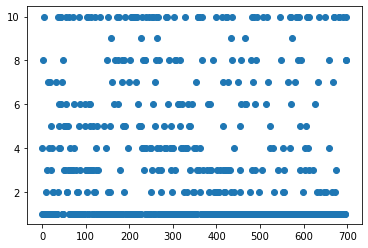

In [30]:
plt.scatter(np.array(range(len(df['Uniformity of Cell Size']))), df['Uniformity of Cell Size'])

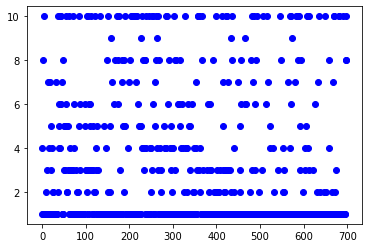

In [12]:
plt.plot(df['Uniformity of Cell Size'], 'bo') 

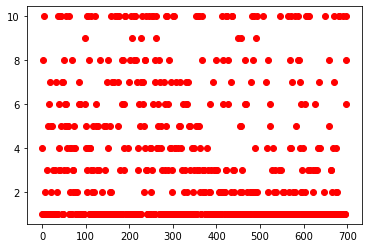

In [13]:
plt.plot(df['Uniformity of Cell Shape'], 'ro')

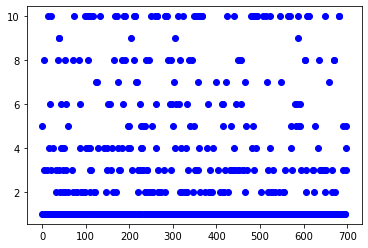

In [14]:
plt.plot(df['Marginal Adhesion'], 'bo')

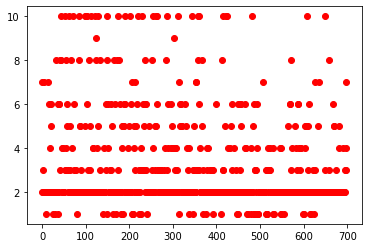

In [15]:
plt.plot(df['Single Epithelial Cell Size'], 'ro')

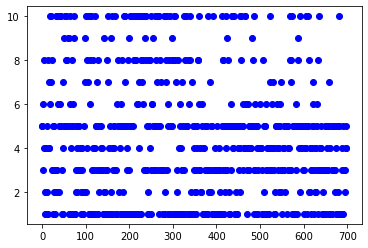

In [16]:
plt.plot(df['Bare Nuclei'], 'bo')

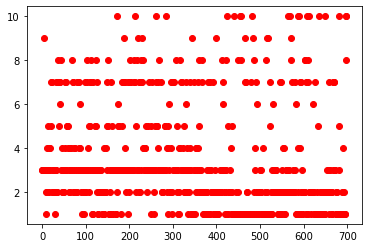

In [17]:
plt.plot(df['Bland Chromatin'], 'ro')

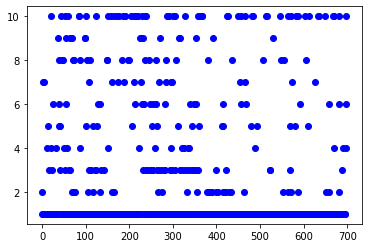

In [18]:
plt.plot(df['Normal Nucleoli'], 'bo')

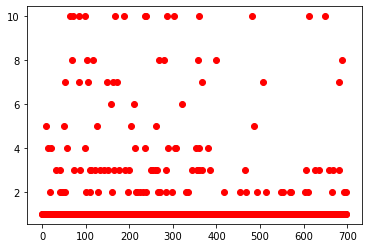

In [19]:
plt.plot(df['Mitoses'], 'ro')

# Normalization

In [20]:
def normalize(dataset):
    dataNorm=((dataset-dataset.min())/(dataset.max()-dataset.min()))*1
    dataNorm["Sample code number"]=dataset["Sample code number"]
    return dataNorm

In [21]:
normalized_df = normalize(df)
normalized_df.head()

,Sample code number,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses,Class
0,1000025,0.444444,0.000000,0.000000,0.000000,0.111111,0.444444,0.222222,0.000000,0.0,0.0
1,1002945,0.444444,0.333333,0.333333,0.444444,0.666667,0.444444,0.222222,0.111111,0.0,0.0
2,1015425,0.222222,0.000000,0.000000,0.000000,0.111111,0.222222,0.222222,0.000000,0.0,0.0
3,1016277,0.555556,0.777778,0.777778,0.000000,0.222222,0.555556,0.222222,0.666667,0.0,0.0
4,1017023,0.333333,0.000000,0.000000,0.222222,0.111111,0.333333,0.222222,0.000000,0.0,0.0


In [22]:
normalized_df

,Sample code number,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses,Class
0,1000025,0.444444,0.000000,0.000000,0.000000,0.111111,0.444444,0.222222,0.000000,0.000000,0.0
1,1002945,0.444444,0.333333,0.333333,0.444444,0.666667,0.444444,0.222222,0.111111,0.000000,0.0
2,1015425,0.222222,0.000000,0.000000,0.000000,0.111111,0.222222,0.222222,0.000000,0.000000,0.0
3,1016277,0.555556,0.777778,0.777778,0.000000,0.222222,0.555556,0.222222,0.666667,0.000000,0.0
4,1017023,0.333333,0.000000,0.000000,0.222222,0.111111,0.333333,0.222222,0.000000,0.000000,0.0
...,...,...,...,...,...,...,...,...,...,...,...
694,776715,0.222222,0.000000,0.000000,0.000000,0.222222,0.222222,0.000000,0.000000,0.000000,0.0
695,841769,0.111111,0.000000,0.000000,0.000000,0.111111,0.111111,0.000000,0.000000,0.000000,0.0
696,888820,0.444444,1.000000,1.000000,0.222222,0.666667,0.444444,0.777778,1.000000,0.111111,1.0
697,897471,0.333333,0.777778,0.555556,0.333333,0.222222,0.333333,1.000000,0.555556,0.000000,1.0
